In [1]:
import geopandas as gpd
NYC_shp = gpd.read_file("Data/Neighborhood.shp")
print (NYC_shp)

          neighborho boroughCod        borough  \
0           Allerton          2          Bronx   
1    Alley Pond Park          4         Queens   
2      Arden Heights          5  Staten Island   
3          Arlington          5  Staten Island   
4           Arrochar          5  Staten Island   
..               ...        ...            ...   
305  Windsor Terrace          3       Brooklyn   
306        Woodhaven          4         Queens   
307         Woodlawn          2          Bronx   
308          Woodrow          5  Staten Island   
309         Woodside          4         Queens   

                                                  F_id  avgScore2  \
0    http://nyc.pediacities.com/Resource/Neighborho...   3.354839   
1    http://nyc.pediacities.com/Resource/Neighborho...   0.000000   
2    http://nyc.pediacities.com/Resource/Neighborho...   3.500000   
3    http://nyc.pediacities.com/Resource/Neighborho...   0.000000   
4    http://nyc.pediacities.com/Resource/Neighborho...

Text(160.06847918108187, 0.5, 'Latitude')

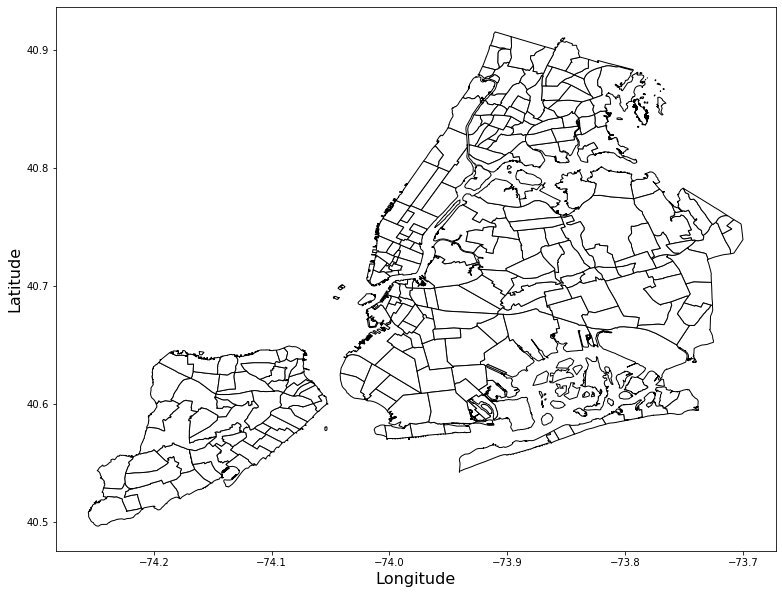

In [3]:
ax = NYC_shp.plot(color='white', edgecolor='black', figsize=(15, 10))
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)

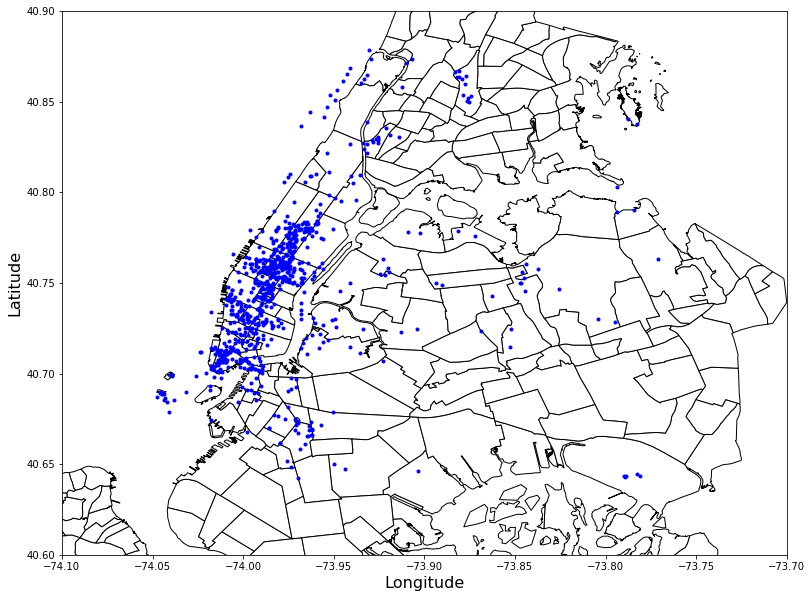

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
flickr_data = pd.read_csv("Data/Flickr_NewYork.csv", header=None)
flickr_lat = flickr_data[2]
flickr_lng = flickr_data[3]
def plot_NYC_map():
    ax = NYC_shp.plot(color='white', edgecolor='black', figsize=(15, 10))
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)
    plt.axis([-74.1,-73.7,40.6,40.9])
plot_NYC_map()
plt.plot(flickr_lng, flickr_lat, "b.")

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
np.random.seed(42)
flickr_loc = np.c_[flickr_lng,flickr_lat]
k_range = range(5,20)
silu_score = []

In [6]:
for k in k_range:
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_label = kmeans_model.fit_predict(flickr_loc)
    silu_score.append(silhouette_score(flickr_loc,cluster_label))

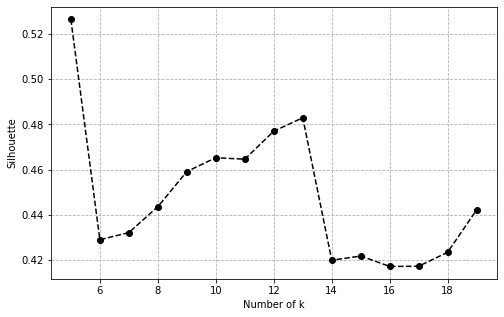

In [7]:
plt.figure(figsize=(8,5))
plt.plot(k_range, silu_score, "ko--")
plt.xlabel("Number of k")
plt.ylabel("Silhouette")
plt.grid(linestyle='--')

In [8]:
kmeans_model = KMeans(n_clusters=13, n_init=10, random_state=42)
cluster_label = kmeans_model.fit_predict(flickr_loc)
color_array = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0',
'#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
'#aaffc3', '#808000', '#ffd8b1', '#000075']

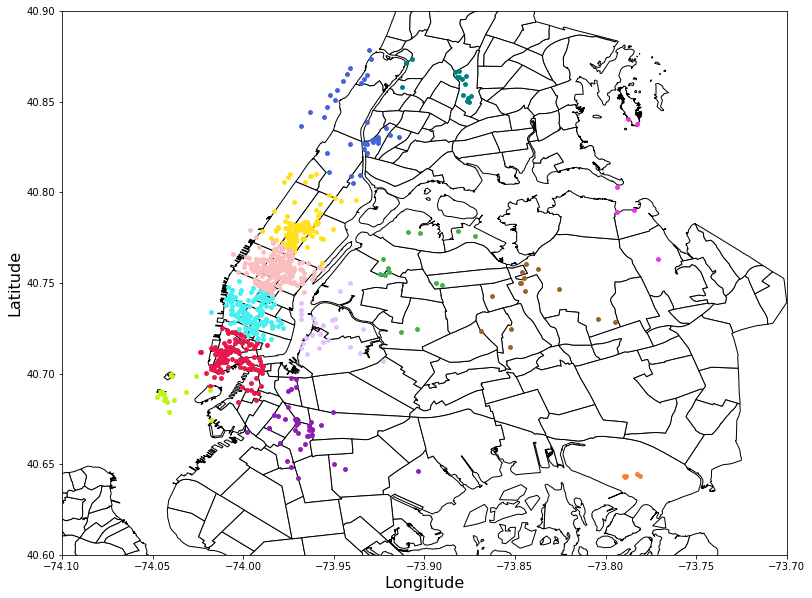

In [9]:
plot_NYC_map()
for cluster_index in range(13):
    plt.scatter(flickr_loc[:,0][cluster_label==cluster_index],
                flickr_loc[:,1][cluster_label==cluster_index], c = color_array[cluster_index], s=15)

In [10]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.002, min_samples=5)
dbscan_label = dbscan.fit_predict(flickr_loc)
cluster_count = len(set(dbscan_label)) - 1


In [11]:
np.random.seed(42)
color_array_rand = []
for i in range(cluster_count):
    color_array_rand.append('#'+'%06X' % np.random.randint(0, 0xFFFFFF))

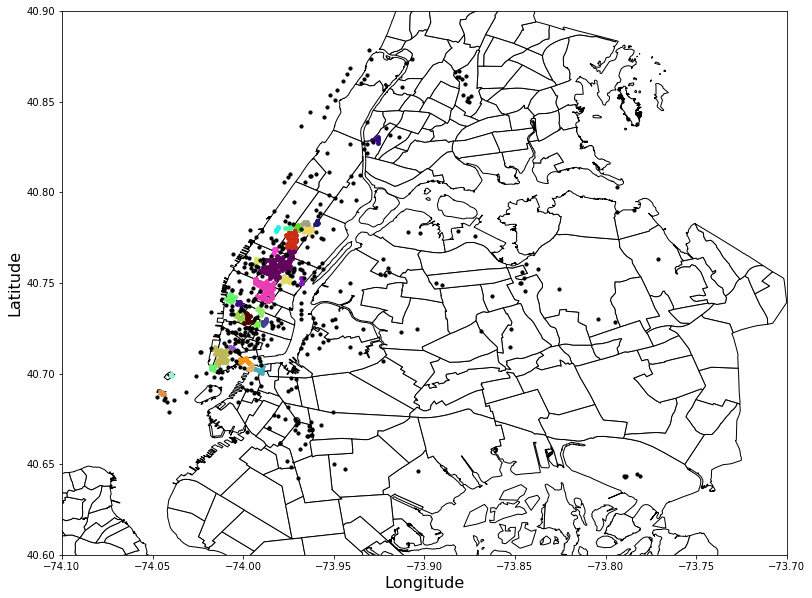

In [12]:
plot_NYC_map()
for cluster_index in range(cluster_count):
    plt.scatter(flickr_loc[:,0][dbscan_label==cluster_index],
                flickr_loc[:,1][dbscan_label==cluster_index], c = color_array_rand[cluster_index],
s=15)
plt.scatter(flickr_loc[:,0][dbscan_label==-1], flickr_loc[:,1][dbscan_label==-1], c =
"black", s=10)

[-74.05, -73.92, 40.67, 40.83]

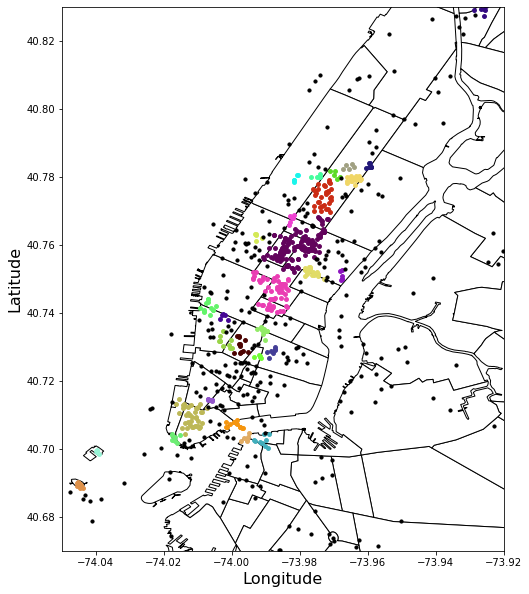

In [13]:
plot_NYC_map()
for cluster_index in range(cluster_count):
    plt.scatter(flickr_loc[:,0][dbscan_label==cluster_index],
                flickr_loc[:,1][dbscan_label==cluster_index], c = color_array_rand[cluster_index],
s=15)
plt.scatter(flickr_loc[:,0][dbscan_label==-1], flickr_loc[:,1][dbscan_label==-1], c =
"black", s=10)
plt.axis([-74.05,-73.92,40.67,40.83])